In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

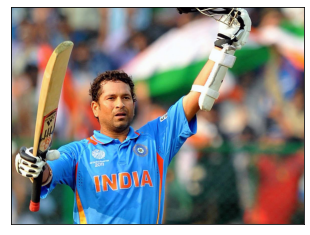

In [21]:
from sklearn.datasets import load_sample_image
initial = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(initial);

In [22]:
initial.shape

(668, 900, 3)

In [23]:
data = initial / 255.0 
data = data.reshape(668*900,3)
data.shape

(601200, 3)

In [24]:
def plot_pixes(data,title,colours=None,N=10000):
    if colours is None:
        colours = data
    
    #choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colours = colours[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colours,marker='.')
    ax[0].set(xlabel='Red',ylabel="Green",xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,color=colours,marker='.')
    ax[1].set(xlabel="Red",ylabel="Blue",xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=20);

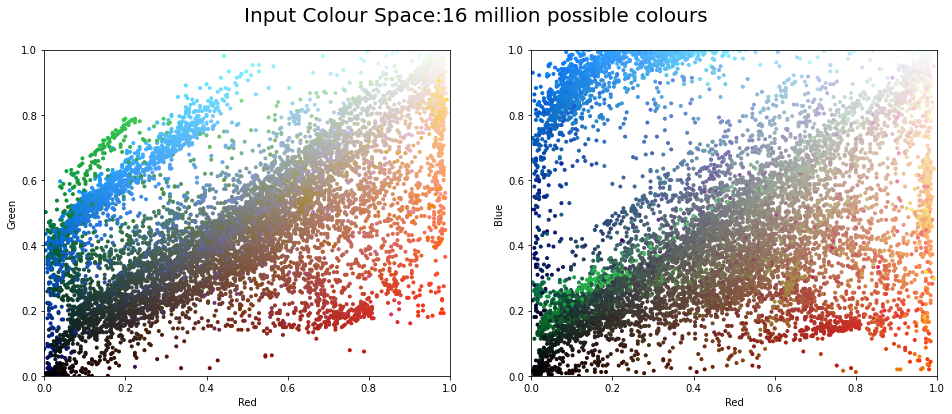

In [25]:
plot_pixes(data,title="Input Colour Space:16 million possible colours")

In [26]:
import warnings; warnings.simplefilter('ignore')

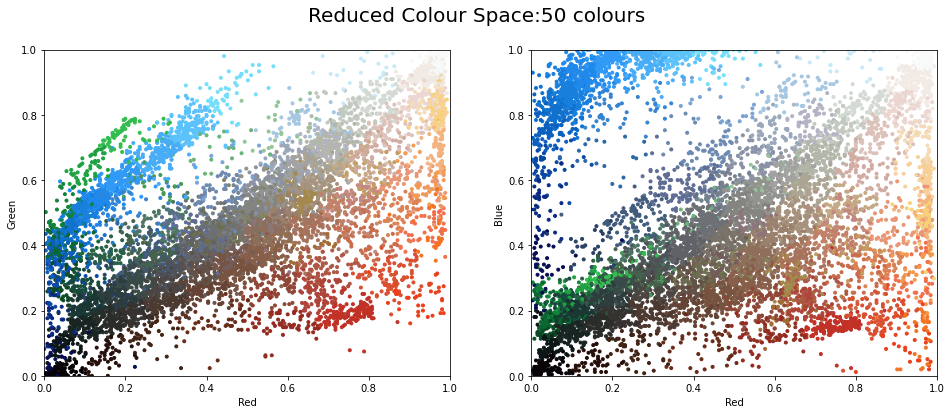

In [31]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(100)
kmeans.fit(data)
new_colours = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixes(data,colours=new_colours,title="Reduced Colour Space:50 colours")

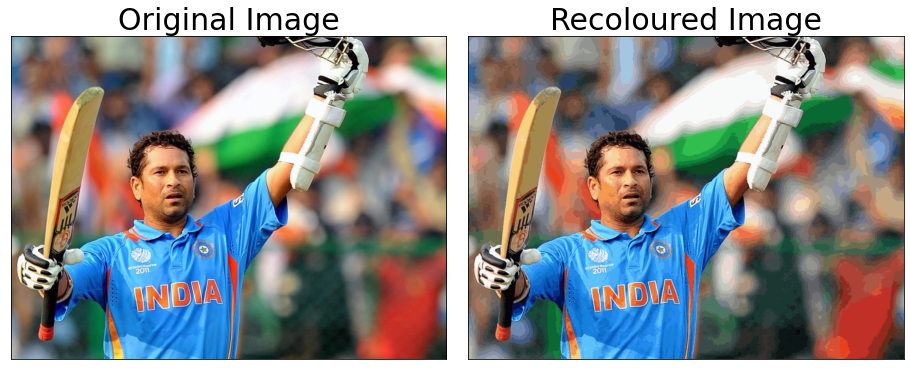

In [32]:
initial_recoloured = new_colours.reshape(initial.shape)
fig , ax = plt.subplots(1,2,figsize=(16,6),
                        subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(initial)
ax[0].set_title('Original Image',size=30)
ax[1].imshow(initial_recoloured)
ax[1].set_title('Recoloured Image',size=30);